In [12]:
import numpy as np
import matplotlib
import h5py as hf
import matplotlib.pyplot as plt
from matplotlib import rcParams


rcParams.update({'figure.autolayout': True})
#Options
params = {
    'text.usetex' : True,
    'font.size' : 10,
    'font.family' : 'serif',
    'font.serif' : ['Palatino'],
    'axes.titlesize' : 11,
    }


rcParams.update(params)
import os

# Utils 

In [160]:
def pather(experiment, method, exp_num, ensemble_num=None):
    if ensemble_num != None:
        path = f'/auto.bee/work/dzimmer/experiments/{experiment}/{method}/exp_{exp_num}/ensemble_{ensemble_num}'
    else:
        path = f'/auto.bee/work/dzimmer/experiments/{experiment}/{method}/exp_{exp_num}/'
    return path

# PPO vs PGO

In [70]:
def download_PPO_vs_PGO(exp, length):
    if length not in [20+i*10 for i in range(9)]:
        raise ValueError("length must be 20, 30, 40, 50, 60, 70, 80, 90, 100")
    if exp == "PPO":
        path_base = "/auto.bee/work/dzimmer/experiments/PPOvsPGO/PPO_run/"
        reward_tag = "reward"
    elif exp == "PGO":
        path_base = "/auto.bee/work/dzimmer/experiments/PPOvsPGO/PGO_run/"
        reward_tag = "rewards"
    else:
        raise ValueError("exp must be PPO or PGO")

    rewards = []
    min_length = 100000000
    path = path_base + f"exp_{length}"
    for i in range(15):
        path_ens = path + f"/ensemble_{i+1}"
        new_reward = np.load(path_ens+f"/{reward_tag}.npy", allow_pickle=True)
        rewards.append(new_reward)
        min_length = np.minimum(min_length, len(rewards[-1]))

    rewards = np.array([rew[0:min_length] for rew in rewards])

    return rewards, min_length

In [71]:
def running_avg(data, window=30):
    return np.convolve(data, np.ones(window)/window, mode='valid')

Text(0.5, 1.0, 'PPO vs PGO at different episode lengths')

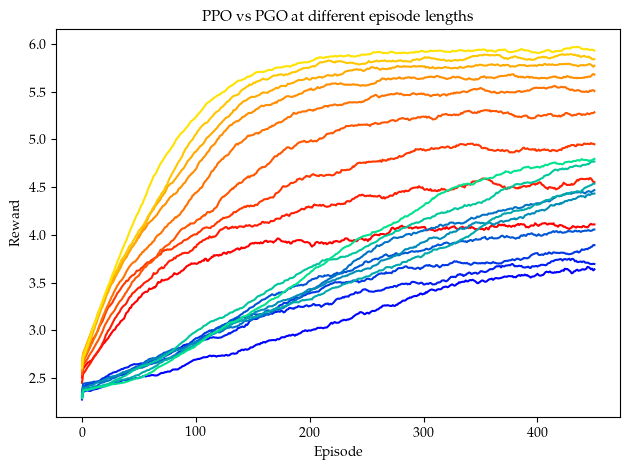

In [72]:
ppo_colormap = plt.cm.autumn
pgo_colormap = plt.cm.winter

PPO_rewards = []
for i in range(9):
    PPO_rewards.append(download_PPO_vs_PGO("PPO", 20+i*10)[0][:,0:480])
PPO_rewards = np.array(PPO_rewards)
mean_PPO_rewards = np.mean(PPO_rewards, axis=1)
avg_PPO_rewards = np.array([running_avg(mean_PPO_rewards[i]) for i in range(9)])


pgo_colormap = plt.cm.winter

PGO_rewards = []
for i in range(9):
    PGO_rewards.append(download_PPO_vs_PGO("PGO", 20+i*10)[0][:,0:480])
PGO_rewards = np.array(PGO_rewards)
mean_PGO_rewards = np.mean(PGO_rewards, axis=1)
avg_PGO_rewards = np.array([running_avg(mean_PGO_rewards[i]) for i in range(9)])

for i in range(9):
    plt.plot(avg_PPO_rewards[i], label=f"PPO {20+i*10}", color=ppo_colormap(i/9))
for j in range(9):
    plt.plot(avg_PGO_rewards[j], label=f"PGO {20+j*10}", color=pgo_colormap(j/9))

# plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.colorbar
# plt.xlim(0, 500)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("PPO vs PGO at different episode lengths")
# plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/PPO_vs_PGO_rewards.png')

/tmp/ipykernel_13239/1199619909.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/PPO_vs_PGO_rewards.pdf', bbox_inches='tight')
/tmp/ipykernel_13239/1199619909.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/PPO_vs_PGO_rewards.pdf', bbox_inches='tight')
/tikhome/dzimmer/miniconda3/envs/swarmrl/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


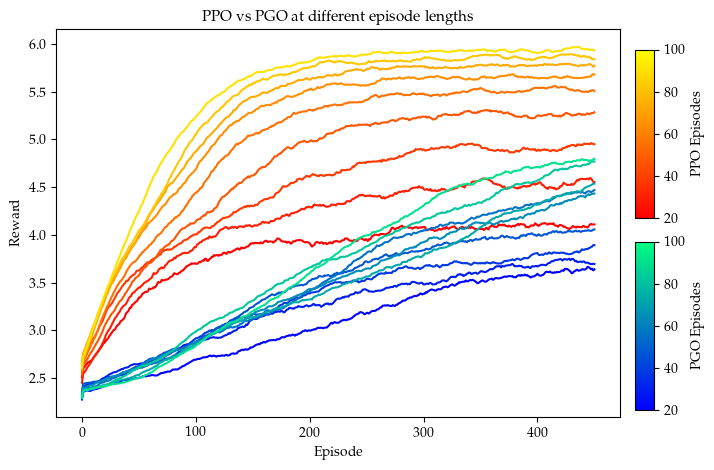

In [75]:


import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a function named 'download_PPO_vs_PGO' and 'running_avg' defined.

# Create subplots with two colorbars
fig, ax1 = plt.subplots()

# Define the first colormap (PPO)
ppo_colormap = plt.cm.autumn
pgo_colormap = plt.cm.winter

# Initialize lists to store rewards
PPO_rewards = []
PGO_rewards = []

# Download rewards for PPO and PGO for different episode lengths
for i in range(9):
    PPO_rewards.append(download_PPO_vs_PGO("PPO", 20 + i * 10)[0][:, 0:480])
    PGO_rewards.append(download_PPO_vs_PGO("PGO", 20 + i * 10)[0][:, 0:480])

# Convert lists to numpy arrays
PPO_rewards = np.array(PPO_rewards)
PGO_rewards = np.array(PGO_rewards)

# Calculate mean rewards
mean_PPO_rewards = np.mean(PPO_rewards, axis=1)
mean_PGO_rewards = np.mean(PGO_rewards, axis=1)

# Calculate running average
avg_PPO_rewards = np.array([running_avg(mean_PPO_rewards[i]) for i in range(9)])
avg_PGO_rewards = np.array([running_avg(mean_PGO_rewards[i]) for i in range(9)])

# Plot the rewards
for i in range(9):
    ax1.plot(avg_PPO_rewards[i], label=f"PPO {20 + i * 10}", color=ppo_colormap(i / 9))
for j in range(9):
    ax1.plot(avg_PGO_rewards[j], label=f"PGO {20 + j * 10}", color=pgo_colormap(j / 9))

# Add legend, labels, and title
# ax1.legend(bbox_to_anchor=(1, 1), loc="upper left")
ax1.set_xlabel("Episode")
ax1.set_ylabel("Reward")
ax1.set_title("PPO vs PGO at different episode lengths")

# Add the second colorbar (PGO)
cax1 = fig.add_axes([1, 0.535, 0.03, 0.35])  # Adjust the position and size of the second colorbar
cmap1 = plt.cm.ScalarMappable(cmap=ppo_colormap)
cmap1.set_array([20, 30, 40, 50, 60, 70, 80, 90, 100])
cbar1 = fig.colorbar(cmap1, cax=cax1, label='PPO Episodes')

cax2 = fig.add_axes([1, 0.135, 0.03, 0.35])  # Adjust the position and size of the second colorbar
cmap2 = plt.cm.ScalarMappable(cmap=pgo_colormap)
cmap2.set_array([20, 30, 40, 50, 60, 70, 80, 90, 100])
cbar2 = fig.colorbar(cmap2, cax=cax2, label='PGO Episodes')


# Show the plot or save it to a file
# plt.show()
plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/PPO_vs_PGO_rewards.pdf', bbox_inches='tight')


# Benchmarking

In [809]:
smell_center_path = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/find_center/smell/trajectory/trajectory.hdf5"

cone_center_path = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/find_center/cone/trajectory/trajectory.hdf5"

graph_center_path = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/find_center/graph/trajectory/trajectory.hdf5"

center_paths = [smell_center_path, cone_center_path, graph_center_path]

In [810]:
smell_group_path = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/find_each_other/smell/trajectory/trajectory.hdf5"

cone_group_path = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/find_each_other/cone/trajectory/trajectory.hdf5"

graph_group_path = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/find_each_other/graph/trajectory/trajectory.hdf5"

group_paths = [smell_group_path, cone_group_path, graph_group_path]

In [811]:
def download_trajectory(path):
    with hf.File(path, 'r') as db:
        position_data = np.array(db["colloids"]["Unwrapped_Positions"][::1])[:,0:20,0:2]
    return position_data

In [164]:
def downloader(experiment, method, exp_num):
    reward_list = []
    length = len(os.listdir(pather(experiment, method, exp_num)))
    for i in range(length):
        path = pather(experiment, method, exp_num, ensemble_num=i+1)
        reward = np.array(np.load(path+"/rewards.npy", allow_pickle=True))
        reward_list.append(reward)
    return reward_list

In [813]:
def dist_center(paths, std=False, save=False):
    data_list = [download_trajectory(path) for path in paths]
    label = ["Smell", "Cone", "Graph"]
    center = 500 * np.ones((np.shape(data_list[0])[0], 1, 2))
    print(np.shape(center))
    for i, data in enumerate(data_list):
        dist = np.linalg.norm(data - center, axis=2)
        mean = np.mean(dist, axis=1)
        plt.plot(mean, label=label[i])
        if std:
            std_value = np.std(dist, axis=1) / np.sqrt(20)
            plt.fill_between(np.arange(np.shape(data)[0]), mean-std_value, mean+std_value, alpha=0.2)

    plt.legend()
    plt.xlabel("Episode")
    plt.ylabel("Mean distance to center")
    plt.title("Mean distance to center for different methods")
    if save:
        plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/dist_center.png')

    return plt


In [814]:
def trajectory_plots(smell_path, cone_path, graph_path, save=False):
    smell_pos = download_trajectory(smell_path)
    cone_pos = download_trajectory(cone_path)
    graph_pos = download_trajectory(graph_path)

    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    n_smell = [0, 1, 2, 3, 19]
    n_cone = [1, 4, 6, 8]
    n_graph = [1, 3, 7, 11, 15]

    ax.plot(smell_pos[:,n_smell,0], smell_pos[:,n_smell,1], label="Smell", color=colors[0])
    ax.plot(cone_pos[:,n_cone,0], cone_pos[:,n_cone,1], label="Cone",  color=colors[1])
    ax.plot(graph_pos[:,n_graph,0], graph_pos[:,n_graph,1], label="Graph", color=colors[2])
    ax.plot(500, 500, 'x', color='black', markersize=10)

    from matplotlib.lines import Line2D
    # custom_lines = [Line2D([0], [0], color=colors[0], lw=2),
    #                 Line2D([0], [0], color=colors[1], lw=2),
    #                 Line2D([0], [0], color=colors[2], lw=2)]
    #
    # ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'])
    ax.legend()
    ax.set_xlabel("x position")
    ax.set_ylabel("y position")
    ax.set_title("Trajectories of different methods")
    ax.set_xlim(100, 900)
    ax.set_ylim(100, 900)
    if save:
        ax.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/trajectory_center.png')
    return ax

In [815]:
trajs = trajectory_plots(smell_path, cone_path, graph_path, save=False)
trajs.show()

NameError: name 'smell_path' is not defined

(100000, 1, 2)


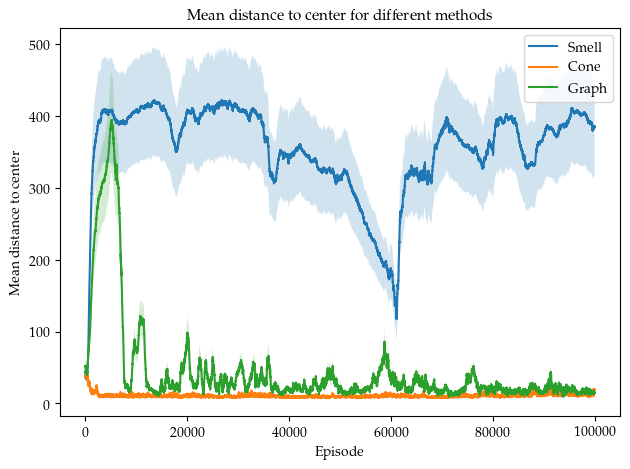

In [816]:
dists = dist_center(paths, std=True, save=True)

# make a big plot

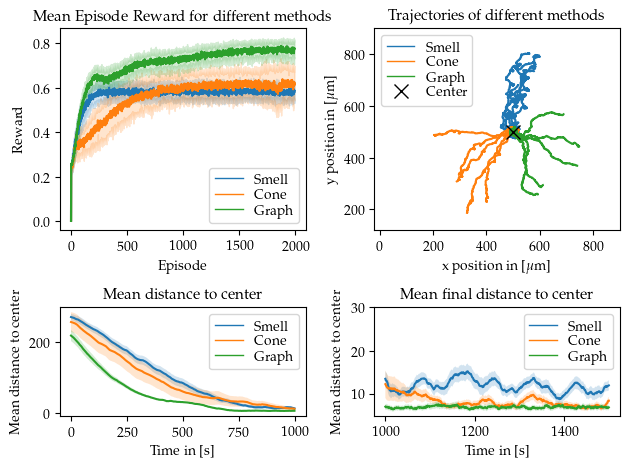

In [895]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
from matplotlib.lines import Line2D

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

black_cross = mlines.Line2D([], [], marker='x', color='black', markersize=10, label="Center", linestyle='None')

custom_lines = [Line2D([0], [0], color=colors[0], lw=1),
                Line2D([0], [0], color=colors[1], lw=1),
                Line2D([0], [0], color=colors[2], lw=1),
                black_cross]

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(5, 2)

# fig, axs = plt.subplot_mosaic([['a)', 'a)', 'b)', 'b)'], ['a)', 'a)', 'b)', 'b)'], ['c)', 'c)','d)', 'd)'], ['c)', 'c)','d)', 'd)']], tight_layout=True)

reward_ax = fig.add_subplot(gs[0:3, 0])
methods = ['smell', 'cone', 'graph']
exp_nums = [4, 4, 5]
rewards = []
means = []
stds = []
for i, meth in enumerate(methods):
    rewards.append(np.array(downloader('find_center', meth, exp_nums[i])))
    mean_reward = np.mean(rewards[-1], axis=0)
    std_reward = np.std(rewards[-1], axis=0)
    means.append(mean_reward)
    stds.append(std_reward)
    reward_ax.plot(mean_reward, label=meth, color=colors[i])
    reward_ax.fill_between(np.arange(len(mean_reward)), mean_reward-std_reward, mean_reward+std_reward, alpha=0.2, color=colors[i])

    reward_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1)
    reward_ax.set_xlabel("Episode")
    reward_ax.set_ylabel("Reward")
    reward_ax.set_title("Mean Episode Reward for different methods")
# reward_ax.text(0.05, 0.95, 'a)', transform=reward_ax.transAxes, fontsize=16, fontweight='bold', va='top')


smell_pos = download_trajectory(smell_center_path)
cone_pos = download_trajectory(cone_center_path)
graph_pos = download_trajectory(graph_center_path)
pos_data = [smell_pos, cone_pos, graph_pos]

dist_ax = fig.add_subplot(gs[3:5, 0])
label = ["Smell", "Cone", "Graph"]
center = 500 * np.ones((np.shape(pos_data[0])[0], 1, 2))

for i, data in enumerate(pos_data):
    dist = np.linalg.norm(data - center, axis=2)[0:1000]
    mean = np.mean(dist, axis=1)
    dist_ax.plot(mean, label=label[i])
    std_value = np.std(dist, axis=1) / np.sqrt(20)
    dist_ax.fill_between(np.arange(1000), mean-std_value, mean+std_value, alpha=0.2)

dist_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1)
dist_ax.set_xlabel("Time in [s]")
dist_ax.set_ylabel("Mean distance to center")
dist_ax.set_title("Mean distance to center")
# dist_ax.text(0.2, 0.95, 'c)', transform=dist_ax.transAxes, fontsize=16, fontweight='bold', va='top')


dist_zoom_ax = fig.add_subplot(gs[3:5, 1])
label = ["Smell", "Cone", "Graph"]
center = 500 * np.ones((np.shape(pos_data[0])[0], 1, 2))
for i, data in enumerate(pos_data):
    dist = np.linalg.norm(data - center, axis=2)[1000:]
    mean = np.mean(dist, axis=1)
    dist_zoom_ax.plot(np.arange(np.shape(dist)[0])+1000, mean, label=label[i])
    std_value = np.std(dist, axis=1) / np.sqrt(20)
    dist_zoom_ax.fill_between(np.arange(np.shape(dist)[0])+1000, mean-std_value, mean+std_value, alpha=0.2)

dist_zoom_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1)
dist_zoom_ax.set_xlabel("Time in [s]")
dist_zoom_ax.set_ylabel("Mean distance to center")
dist_zoom_ax.set_title("Mean final distance to center")
dist_zoom_ax.set_ylim([5, 30])
# dist_zoom_ax.text(0.05, 0.95, 'd)', transform=dist_zoom_ax.transAxes, fontsize=16, fontweight='bold', va='top')

a = [1, 4, 8, 5, 7]
traj_ax = fig.add_subplot(gs[0:3, 1])
n_smell = [0, 1, 2, 3, 19]
n_cone = [1, 4, 8, 5, 7]
n_graph = [6, 7, 11, 12, 15]

traj_ax.plot(smell_pos[:,n_smell,0], smell_pos[:,n_smell,1], label="Smell", color=colors[0])
traj_ax.plot(cone_pos[:,n_cone,0], cone_pos[:,n_cone,1], label="Cone",  color=colors[1])
traj_ax.plot(graph_pos[:,n_graph,0], graph_pos[:,n_graph,1], label="Graph", color=colors[2])
traj_ax.plot(500, 500, 'x', color='black', markersize=10, label="Center")


traj_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph', 'Center'], labelspacing=0.1)
traj_ax.set_xlabel(r"x position in [$\mu$m]")
traj_ax.set_ylabel(r"y position in [$\mu$m]")
traj_ax.set_title("Trajectories of different methods")
traj_ax.set_xlim(-20, 900)
traj_ax.set_ylim(120, 900)
# traj_ax.text(0.05, 0.95, 'b)', transform=traj_ax.transAxes, fontsize=16, fontweight='bold', va='top')

# plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/find_center.pdf')


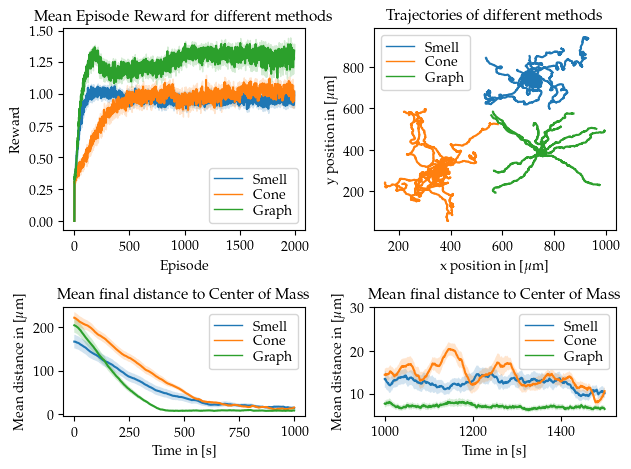

In [877]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
from matplotlib.lines import Line2D

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

black_cross = mlines.Line2D([], [], marker='x', color='black', markersize=10, label="Center", linestyle='None')

custom_lines = [Line2D([0], [0], color=colors[0], lw=1),
                Line2D([0], [0], color=colors[1], lw=1),
                Line2D([0], [0], color=colors[2], lw=1),
                black_cross]

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(5, 2)

# fig, axs = plt.subplot_mosaic([['a)', 'a)', 'b)', 'b)'], ['a)', 'a)', 'b)', 'b)'], ['c)', 'c)','d)', 'd)'], ['c)', 'c)','d)', 'd)']], tight_layout=True)

reward_ax = fig.add_subplot(gs[0:3, 0])
methods = ['smell', 'cone', 'graph']
exp_nums = [5, 4, 4]
rewards = []
means = []
stds = []
for i, meth in enumerate(methods):
    if meth != 'graph':
        rewards.append(np.array(downloader('find_each_other', meth, exp_nums[i])))
    else:
        rewards.append(np.array(downloader3('find_each_other', meth, exp_nums[i])))
    mean_reward = np.mean(rewards[-1], axis=0)
    std_reward = np.std(rewards[-1], axis=0) / np.sqrt(30)
    means.append(mean_reward)
    stds.append(std_reward)
    reward_ax.plot(mean_reward, label=meth, color=colors[i])
    reward_ax.fill_between(np.arange(len(mean_reward)), mean_reward-std_reward, mean_reward+std_reward, alpha=0.2, color=colors[i])


    reward_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1)
    reward_ax.set_xlabel("Episode")
    reward_ax.set_ylabel("Reward")
    reward_ax.set_title("Mean Episode Reward for different methods")
# reward_ax.text(0.05, 0.95, 'a)', transform=reward_ax.transAxes, fontsize=16, fontweight='bold', va='top')


smell_group_pos = download_trajectory(smell_group_path)
cone_group_pos = download_trajectory(cone_group_path)
graph_group_pos = download_trajectory(graph_group_path)
pos_group_data = [smell_group_pos, cone_group_pos, graph_group_pos]

dist_ax = fig.add_subplot(gs[3:5, 0])
label = ["Smell", "Cone", "Graph"]
for i, data in enumerate(pos_group_data):
    # compute the distance to the center of mass of the data
    center_of_mass = np.mean(data, axis=1)[0:1000]
    dist = np.linalg.norm(data[0:1000] - center_of_mass[:, np.newaxis, :], axis=2)
    mean = np.mean(dist, axis=1)
    plt.plot(mean, label=label[i])
    std_value = np.std(dist, axis=1) / np.sqrt(20)
    plt.fill_between(np.arange(1000), mean-std_value, mean+std_value, alpha=0.2)

dist_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1)
dist_ax.set_xlabel("Time in [s]")
dist_ax.set_ylabel("Mean distance in [$\mu$m]")
dist_ax.set_title("Mean final distance to Center of Mass")
# dist_ax.text(0.2, 0.95, 'c)', transform=dist_ax.transAxes, fontsize=16, fontweight='bold', va='top')


dist_zoom_ax = fig.add_subplot(gs[3:5, 1])
label = ["Smell", "Cone", "Graph"]
center = 500 * np.ones((np.shape(pos_group_data[0])[0], 1, 2))
for i, data in enumerate(pos_group_data):
    center_of_mass = np.mean(data, axis=1)[1000:]
    dist = np.linalg.norm(data[1000:] - center_of_mass[:, np.newaxis, :], axis=2)
    mean = np.mean(dist, axis=1)
    dist_zoom_ax.plot(np.arange(np.shape(dist)[0])+1000, mean, label=label[i])
    std_value = np.std(dist, axis=1) / np.sqrt(20)
    dist_zoom_ax.fill_between(np.arange(np.shape(dist)[0])+1000, mean-std_value, mean+std_value, alpha=0.2)

dist_zoom_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1)
dist_zoom_ax.set_xlabel("Time in [s]")
dist_zoom_ax.set_ylabel("Mean distance in [$\mu$m]")
dist_zoom_ax.set_ylim([5, 30])
dist_zoom_ax.set_title("Mean final distance to Center of Mass")
# dist_zoom_ax.text(0.05, 0.95, 'd)', transform=dist_zoom_ax.transAxes, fontsize=16, fontweight='bold', va='top')


traj_group_ax = fig.add_subplot(gs[0:3, 1])
# list from 0 to 19
n_smell = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n_cone = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
n_graph = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


traj_group_ax.plot(smell_group_pos[:,n_smell,0][0:1000]+200, smell_group_pos[:,n_smell,1][0:1000], label="Smell", color=colors[0])
traj_group_ax.plot(cone_group_pos[:,n_cone,0][0:1000], cone_group_pos[:,n_cone,1][0:1000], label="Cone",  color=colors[1])
traj_group_ax.plot(graph_group_pos[:,n_graph,0][0:1000], graph_group_pos[:,n_graph,1][0:1000], label="Graph", color=colors[2])
# traj_group_ax.plot(500, 500, 'x', color='black', markersize=10, label="Center")


traj_group_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1, loc="upper left")
traj_group_ax.set_xlabel(r"x position in [$\mu$m]")
traj_group_ax.set_ylabel(r"y position in [$\mu$m]")
traj_group_ax.set_title("Trajectories of different methods")
# traj_group_ax.set_xlim(100, 900)
# traj_group_ax.set_ylim(100, 900)
# traj_ax.text(0.05, 0.95, 'b)', transform=traj_ax.transAxes, fontsize=16, fontweight='bold', va='top')

# plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/find_each_other.pdf')


In [146]:
def downloader3(experiment, method, exp_num):
    reward_list = []
    length = len(os.listdir(pather(experiment, method, exp_num)))
    for i in range(length):
        path = pather(experiment, method, exp_num, ensemble_num=i+1)
        reward1 = np.array(np.load(path+"/reward.npy", allow_pickle=True))
        reward2 = np.array(np.load(path+"/reward_2.npy", allow_pickle=True))
        reward = np.append(reward1, reward2[40:])
        reward_list.append(reward[0:1992])
    return reward_list


In [147]:
experiment_dict = {
    'find_center': "Find Center",
    'find_each_other': "Form Group",
    'drug_delivery': "Drug Delivery",
    'rod_rot': "Rod Rotation"
}

methods_dict = {
    'smell': "Gradient Sensing",
    'cone': "Vision Cones",
    'graph': "Graph"
}

In [152]:
def plotter(experiment, method, exp_num, only_high_performer=False, plot_mean=False, window=None, save=False):
    # print(f'{experiment_dict[experiment]}, {methods_dict[method]}')
    rewards = downloader(experiment, method, exp_num)
    
    ensemble_mean = np.array([np.mean(rewards[i]) for i in range(len(rewards))])
    final_mean = np.array([np.mean(rewards[i][-400:]) for i in range(len(rewards))])
    high_performer_indices = np.argsort(-final_mean)[:10]
    
    # plot all traj
    min_len = 100000000
    for rew in rewards:
        min_len = np.minimum(min_len, len(rew))
        
    reward_array = np.array([rew[0:min_len] for rew in rewards])
    print(np.shape(reward_array))
    mean_reward = np.mean(reward_array, axis=0)
    std_reward = np.std(reward_array, axis=0)

    if plot_mean:
        plt.plot(mean_reward, color='black')
        plt.fill_between(range(len(mean_reward)), mean_reward-std_reward, mean_reward+std_reward, color='black', alpha=0.1)
    else:
        if not only_high_performer:
            for rew in rewards:
                plt.plot(rew, color="lightgrey")
            plt.plot(mean_reward, color='black')

        else:
            for i, rew in enumerate(rewards):
                if i in high_performer_indices:
                    plt.plot(rew, color="lightgrey")
            plt.plot(np.mean(reward_array[high_performer_indices], axis=0),  color='black')

        # plot the best 5 trajs
        print('Ensemble means:')
        if only_high_performer:
            print(ensemble_mean[high_performer_indices])
            print('High perfomring:')
            print(high_performer_indices+1)
        else:
            print(ensemble_mean)

    final_mean = np.array([np.mean(rewards[i][-400:]) for i in range(len(rewards))])
    print('final rewards:')
    print(np.mean(final_mean))

    plt.xlabel('n epsiode')
    plt.ylabel('mean reward per episode')
    plt.title("Reward over Episodes")
    if window != None:
        plt.ylim(0, window)

    if save:
        plt.savefig(f'/tikhome/dzimmer/work/plots and data/{experiment}/{method}/{exp_num}.png')
    plt.show()

In [170]:
def plot_together(experiment, exp_nums,save=False):
    methods = ['smell', 'cone', 'graph']
    rewards = []
    means = []
    stds = []
    for i, meth in enumerate(methods):
        rewards.append(np.array(downloader(experiment, meth, exp_nums[i])))
        mean_reward = np.mean(rewards[-1], axis=0)
        std_reward = np.std(rewards[-1], axis=0)
        means.append(mean_reward)
        stds.append(std_reward)
    # plot all traj
    for i, meth in enumerate(methods):
        plt.plot(means[i], label=methods_dict[meth])
        plt.fill_between(range(len(means[i])), means[i]-stds[i], means[i]+stds[i], alpha=0.4)
    # legend in the low right corner
    plt.legend(loc='lower right')

    plt.xlabel('n epsiode')
    plt.ylabel('mean reward per episode')
    plt.title("Reward over Episodes")
    # if save:
        # plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/rewards_{experiment}.png')
    plt.show()


In [171]:
# plot_together('find_center', [4, 4, 5], save=False)
# plot_together('find_each_other', [5, 1, 4], save=False)

(30, 1992)
final rewards:
3.1343963363631886


FileNotFoundError: [Errno 2] No such file or directory: '/tikhome/dzimmer/work/plots and data/rod_rot/graph3/1.png'

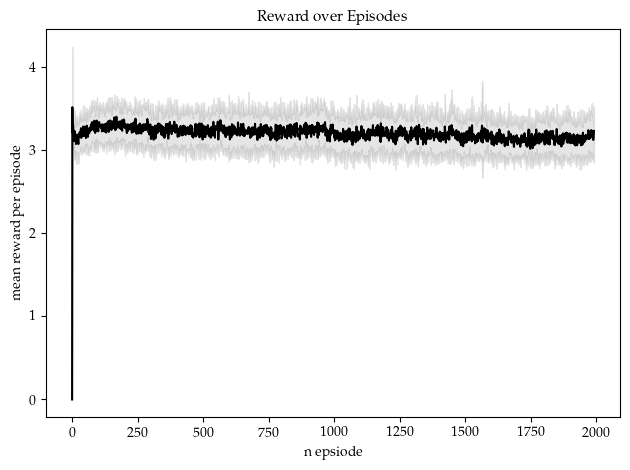

In [173]:
window_set=1.0
plotter("rod_rot", "graph3", 1, only_high_performer=True, plot_mean=True, window=None, save=True)
plotter("find_center", "cone", 4, only_high_performer=True, plot_mean=False, window=window_set, save=True)
plotter("find_center", "graph", 5, only_high_performer=True, plot_mean=True, window=window_set, save=True)

Form Group, Gradient Sensing
(30, 1992)
final rewards:
0.9556500393228722


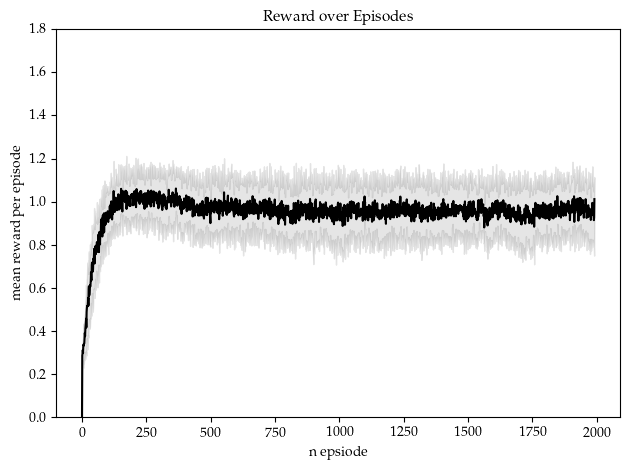

Form Group, Vision Cones
(30, 1992)
Ensemble means:
[0.72618194 1.0111499  0.88640458 0.77808611 0.95411326 0.87015892
 0.64297427 0.8542172  0.89998248 1.01975374 1.04497679 0.91105384
 1.00362238 0.91165032 0.96866754 0.94027309 0.99778294 0.9563406
 0.81479685 1.02500211 0.98325745 1.06973031 1.07754906 0.8477743
 0.97172492 0.86467425 1.0697356  1.00497667 0.83857734 0.8869537 ]
final rewards:
1.021578894758927


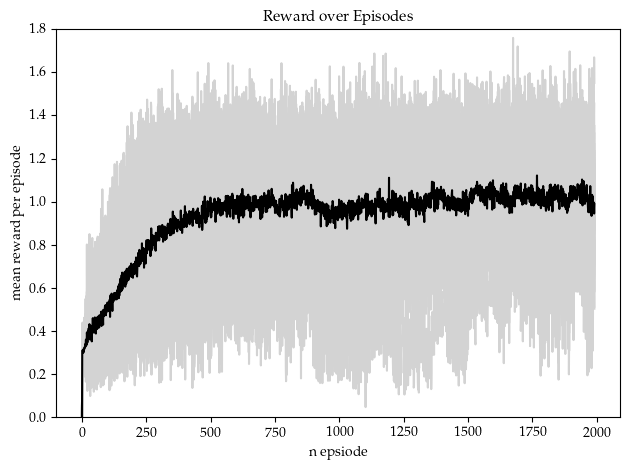

Form Group, Graph
(30, 1852)
final rewards:
1.291672791886501


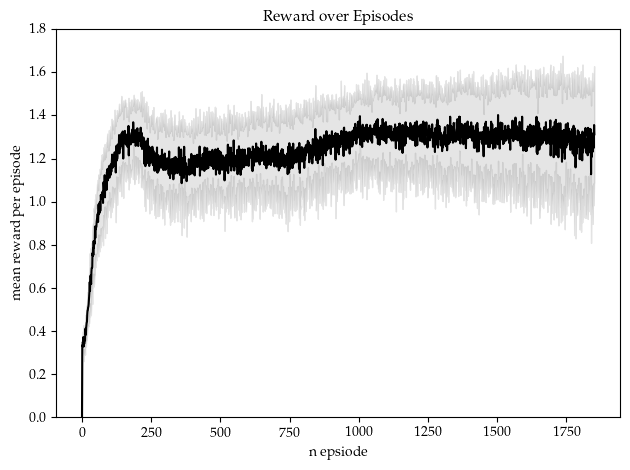

In [826]:
window_set = 1.8
plotter("find_each_other", "smell", 5, only_high_performer=False, plot_mean=True, window=window_set)
plotter("find_each_other", "cone", 4, only_high_performer=False, plot_mean=False, window=window_set)
plotter("find_each_other", "graph", 4, only_high_performer=False, plot_mean=True, window=window_set)

# Check Current Simulation

### Sheep Shepard with graph_0

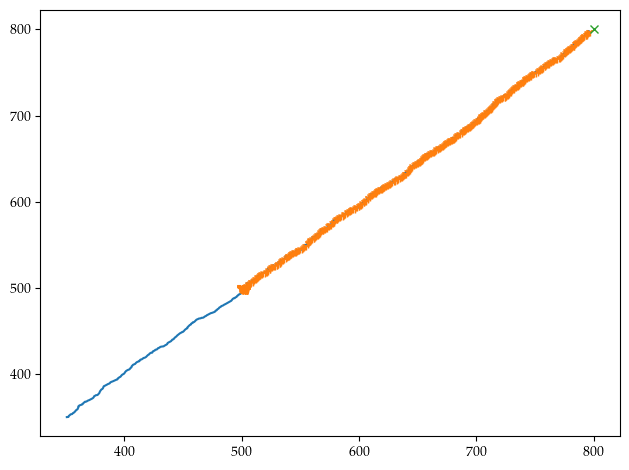

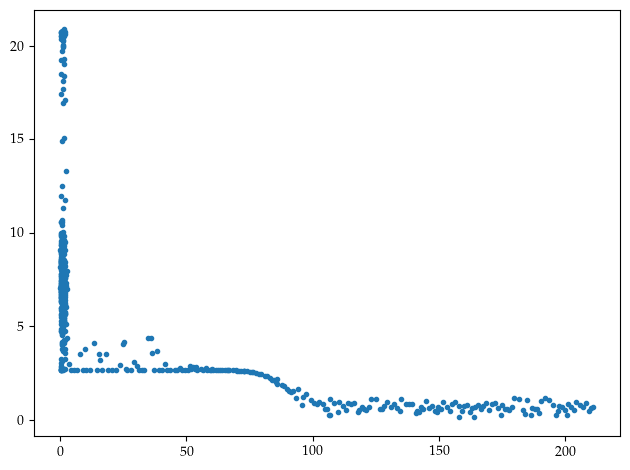

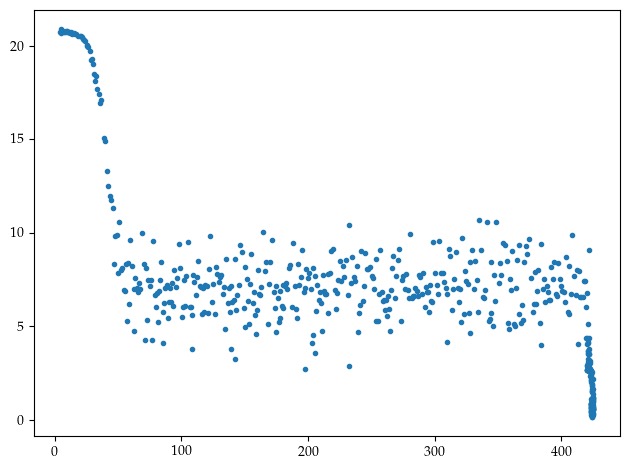

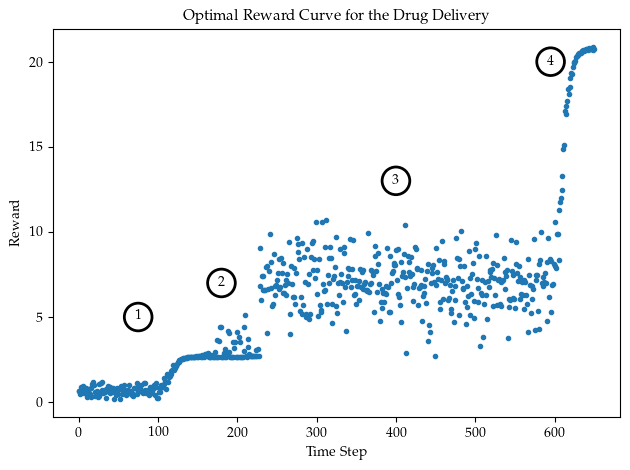

In [959]:
test_traj = np.load("/tikhome/dzimmer/work/repositories/SwarmRL/CI/unit_tests/tasks/positions.npy", allow_pickle=True)

colloid = test_traj[:,0,:]
drug = test_traj[:,1,:]

plt.plot(colloid[:,0], colloid[:,1], '-')
plt.plot(drug[:,0], drug[:,1], '1')
plt.plot(800,800, 'x')
plt.show()

distance = np.linalg.norm(colloid - drug, axis=1)
offset = np.ones_like(drug)*800
offset[:,-1] = 0
durg_dest_dist = np.linalg.norm(drug - offset , axis=1)

#
# print((durg_dest_dist))

test_rewards = np.load("/tikhome/dzimmer/work/repositories/SwarmRL/CI/unit_tests/tasks/rewards.npy", allow_pickle=True)
plt.plot(distance, test_rewards,  '.')
plt.show()
plt.plot(durg_dest_dist, test_rewards,  '.')
plt.show()
factors = np.load("/tikhome/dzimmer/work/repositories/SwarmRL/CI/unit_tests/tasks/factors.npy", allow_pickle=True)

# plt.ylim(-0.1, 1.1)
plt.show()

plt.plot(test_rewards,  '.')
plt.title('Optimal Reward Curve for the Drug Delivery')
plt.xlabel('Time Step')
plt.ylabel('Reward')
plt.text(75, 5, "1", size=10,
         ha="center", va="center",
         bbox=dict(boxstyle="circle",
                   pad=0.5, fc="white", ec="black", lw=2))
plt.text(180, 7, "2", size=10,
         ha="center", va="center",
         bbox=dict(boxstyle="circle",
                   pad=0.5, fc="white", ec="black", lw=2))
plt.text(400, 13, "3", size=10,
         ha="center", va="center",
         bbox=dict(boxstyle="circle",
                   pad=0.5, fc="white", ec="black", lw=2))
plt.text(595, 20, "4", size=10,
         ha="center", va="center",
         bbox=dict(boxstyle="circle",
                   pad=0.5, fc="white", ec="black", lw=2))
plt.savefig("/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/drug_delivery_reward_curve.pdf", format='pdf')


# Rod Velocity

In [828]:
def compute_angle_between(v1, v2):
    angle = np.arctan2(
        np.cross(v1, v2),
        np.dot(v1, v2)
    ) * 180 / np.pi
    return angle

In [829]:
def rod_vel_pather(method, exp_num):
    means = []
    ranges = []
    for j in range(30):
        path = f"/auto.bee/work/dzimmer/experiments/rod_rot/graph{method}/exp_{exp_num}/ensemble_{j+1}/rod_rot_graph/trajectory.hdf5"
        try:
            angle_velocity, times, traj_ranges= compute_velocities(path, 25)
            ranges.append(times[-1])
            mean_angle_velocity = np.mean(angle_velocity[int(len(angle_velocity)*0.9):], axis=0)
            means.append(mean_angle_velocity)
        except:
            pass
    return means, ranges


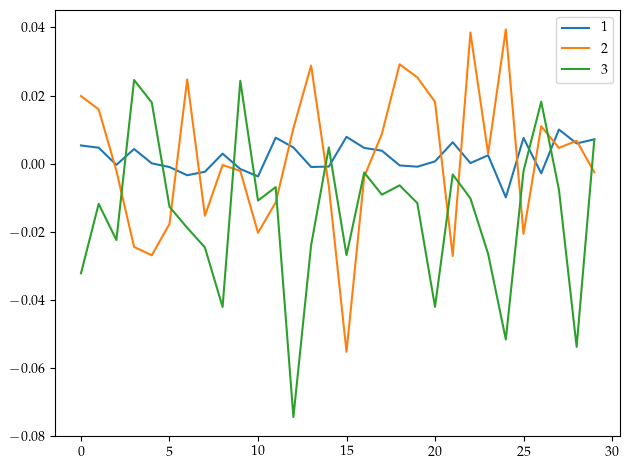

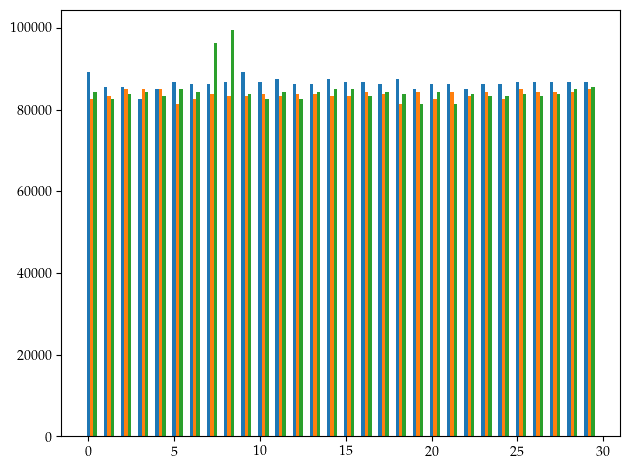

In [841]:
ranger_manger = []
data_0, ranges_0 = rod_vel_pather(1, 1)
ranger_manger.append(ranges_0)
plt.plot(data_0, label="1")
data_1, ranges_1 = rod_vel_pather(2, 1)
ranger_manger.append(ranges_1)
plt.plot(data_1, label="2")
data_2, ranges_2 = rod_vel_pather(3, 1)
ranger_manger.append(ranges_2)
plt.plot(data_2, label="3")

plt.legend()
plt.show()

for i, data in enumerate(ranger_manger):
    # barplots of ranger manger
    plt.bar(np.arange(len(data))+i*0.2, data, width=0.2, label=f"graph_{i+1}")

In [840]:
import h5py as hf
import matplotlib.pyplot as plt
import numpy as np
import colorsys
import random
import argparse


def compute_velocities(path, slice):

    with hf.File(path, 'r') as db:
            position_data = db["colloids"]["Unwrapped_Positions"][::slice][-400:-1]
            direction_data = db["colloids"]["Directors"][::slice][-400:-1]
            type_data = db["colloids"]["Types"][::slice][-400:-1]
            times= np.squeeze(db["colloids"]["Times"][::slice])[-400:-1]

    types = np.squeeze(type_data[0])
    traj_range = np.shape(times)[0]
    unique_ints, counts = np.unique(types, return_counts=True)
    count_dict = dict(zip(unique_ints, counts))
    num_of_types = len(count_dict.keys())

    indices = []
    for type_ in count_dict.keys():
        indices.append(np.where(types == type_)[0][-1])

    # create a dictionary with the positions of each type
    colloid_pos = []
    colloid_directors = []
    delta_t = times[1]-times[0]

    for k in range(num_of_types):
        if k == 0:
            colloid_pos.append(position_data[:, :indices[k]+1, :])
            colloid_directors.append(direction_data[:, indices[k]+1, :])

        else:
            colloid_pos.append(position_data[:, indices[k-1]+1:indices[k]+1, :])
            colloid_directors.append(direction_data[:, indices[k-1]+1, :])

    rod_directors = colloid_directors[1][:, 0:2]
    np.shape(rod_directors)

    angular_velocities = []
    for i in range(np.shape(rod_directors)[0]-1):
        angular_velocities.append(compute_angle_between(rod_directors[i], rod_directors[i+1]))
    angular_velocities = np.array(angular_velocities) / delta_t
    return angular_velocities, times[0:-1], traj_range

In [832]:
slice = 100
path1 = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/rod_rot/graph1/rod_rot_graph/trajectory.hdf5"
path2 = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/rod_rot/graph2/rod_rot_graph/trajectory.hdf5"
path3 = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/rod_rot/graph3/rod_rot_graph/trajectory.hdf5"
paths = [path1, path2, path3]

Text(0.5, 1.0, 'Angular Rod Velocity over time')

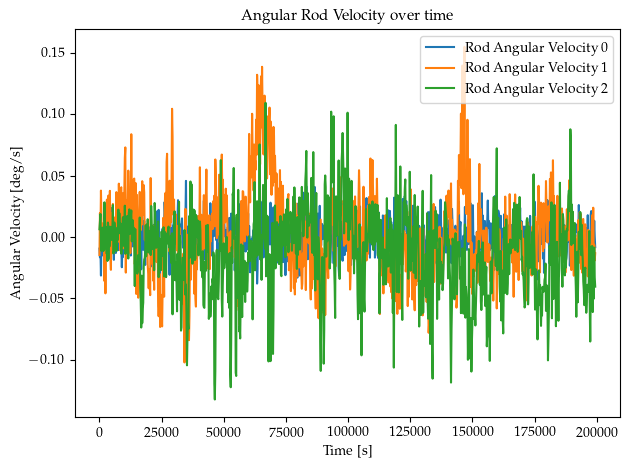

In [833]:
velocieties = []
times = []
for path in paths:
    vel, time, _= compute_velocities(path, slice)
    velocieties.append(vel)
    times.append(time)
for i in range(len(velocieties)):
    plt.plot(times[i], velocieties[i], label=f"Rod Angular Velocity {i}")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel(r'Angular Velocity [deg/s]')
plt.title('Angular Rod Velocity over time')


In [953]:
rewards_drug = np.load("/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/drug_delivery/graph/rewards.npy", allow_pickle=True)[-200:-1]

In [961]:
drug_path = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/drug_delivery/graph/trajectory/trajectory.hdf5"

In [968]:
with hf.File(drug_path, 'r') as db:
            position_data = db["colloids"]["Unwrapped_Positions"][::10][-400:-1][:,:,0:2]
            direction_data = db["colloids"]["Directors"][::10][-400:-1][:,:,0:2]
            type_data = db["colloids"]["Types"][::10][-400:-1]
            times= np.squeeze(db["colloids"]["Times"][::10])[-400:-1]

In [967]:
print(np.shape(position_data))

(399, 12, 2)


In [ ]:
cols

# Temperature

Text(0.5, 1.0, 'Trajectories of different methods')

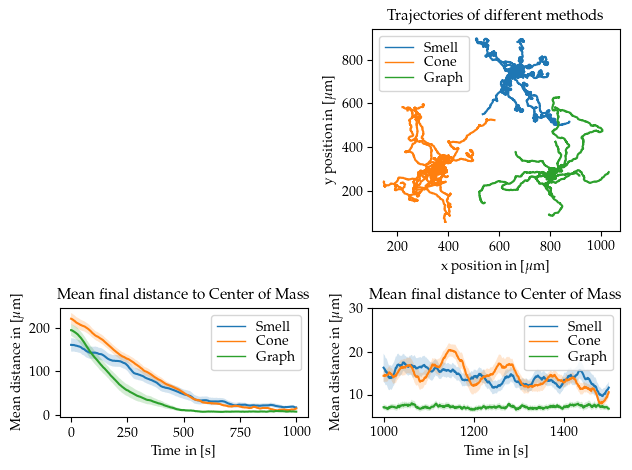

In [980]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
from matplotlib.lines import Line2D

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

black_cross = mlines.Line2D([], [], marker='x', color='black', markersize=10, label="Center", linestyle='None')

custom_lines = [Line2D([0], [0], color=colors[0], lw=1),
                Line2D([0], [0], color=colors[1], lw=1),
                Line2D([0], [0], color=colors[2], lw=1),
                black_cross]

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(5, 2)

# fig, axs = plt.subplot_mosaic([['a)', 'a)', 'b)', 'b)'], ['a)', 'a)', 'b)', 'b)'], ['c)', 'c)','d)', 'd)'], ['c)', 'c)','d)', 'd)']], tight_layout=True)



smell_group_pos = download_trajectory(smell_group_path)
cone_group_pos = download_trajectory(cone_group_path)
graph_group_pos = download_trajectory(graph_group_path)
pos_group_data = [smell_group_pos, cone_group_pos, graph_group_pos]

dist_ax = fig.add_subplot(gs[3:5, 0])
label = ["Smell", "Cone", "Graph"]
for i, data in enumerate(pos_group_data):
    # compute the distance to the center of mass of the data
    center_of_mass = np.mean(data, axis=1)[0:1000]
    dist = np.linalg.norm(data[0:1000] - center_of_mass[:, np.newaxis, :], axis=2)
    mean = np.mean(dist, axis=1)
    plt.plot(mean, label=label[i])
    std_value = np.std(dist, axis=1) / np.sqrt(20)
    plt.fill_between(np.arange(1000), mean-std_value, mean+std_value, alpha=0.2)

dist_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1)
dist_ax.set_xlabel("Time in [s]")
dist_ax.set_ylabel("Mean distance in [$\mu$m]")
dist_ax.set_title("Mean final distance to Center of Mass")
# dist_ax.text(0.2, 0.95, 'c)', transform=dist_ax.transAxes, fontsize=16, fontweight='bold', va='top')


dist_zoom_ax = fig.add_subplot(gs[3:5, 1])
label = ["Smell", "Cone", "Graph"]
center = 500 * np.ones((np.shape(pos_group_data[0])[0], 1, 2))
for i, data in enumerate(pos_group_data):
    center_of_mass = np.mean(data, axis=1)[1000:]
    dist = np.linalg.norm(data[1000:] - center_of_mass[:, np.newaxis, :], axis=2)
    mean = np.mean(dist, axis=1)
    dist_zoom_ax.plot(np.arange(np.shape(dist)[0])+1000, mean, label=label[i])
    std_value = np.std(dist, axis=1) / np.sqrt(20)
    dist_zoom_ax.fill_between(np.arange(np.shape(dist)[0])+1000, mean-std_value, mean+std_value, alpha=0.2)

dist_zoom_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1)
dist_zoom_ax.set_xlabel("Time in [s]")
dist_zoom_ax.set_ylabel("Mean distance in [$\mu$m]")
dist_zoom_ax.set_ylim([5, 30])
dist_zoom_ax.set_title("Mean final distance to Center of Mass")
# dist_zoom_ax.text(0.05, 0.95, 'd)', transform=dist_zoom_ax.transAxes, fontsize=16, fontweight='bold', va='top')


traj_group_ax = fig.add_subplot(gs[0:3, 1])
# list from 0 to 19
n_smell = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n_cone = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
n_graph = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


traj_group_ax.plot(smell_group_pos[:,n_smell,0][0:1000]+200, smell_group_pos[:,n_smell,1][0:1000], label="Smell", color=colors[0])
traj_group_ax.plot(cone_group_pos[:,n_cone,0][0:1000], cone_group_pos[:,n_cone,1][0:1000], label="Cone",  color=colors[1])
traj_group_ax.plot(graph_group_pos[:,n_graph,0][0:1000], graph_group_pos[:,n_graph,1][0:1000], label="Graph", color=colors[2])
# traj_group_ax.plot(500, 500, 'x', color='black', markersize=10, label="Center")


traj_group_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1, loc="upper left")
traj_group_ax.set_xlabel(r"x position in [$\mu$m]")
traj_group_ax.set_ylabel(r"y position in [$\mu$m]")
traj_group_ax.set_title("Trajectories of different methods")
# traj_group_ax.set_xlim(100, 900)
# traj_group_ax.set_ylim(100, 900)
# traj_ax.text(0.05, 0.95, 'b)', transform=traj_ax.transAxes, fontsize=16, fontweight='bold', va='top')

# plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/find_each_other.pdf')

# Activation Function

In [ ]:
rcParams.update({'figure.autolayout': True})

#Options
params = {
    'text.usetex' : True,
    'font.size' : 12,
    'font.family' : 'serif',
    'font.serif' : ['Palatino'],
    'axes.titlesize' : 11,
    }
rcParams.update(params)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x):
    return np.maximum(0.1*x, x)

x = np.linspace(-5, 5, 10000)

In [ ]:
plt.plot(x, sigmoid(x))
plt.ylim()
plt.xlabel("x")
plt.ylabel("activation")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create an array of x values from -5 to 5
x = np.linspace(-5, 5, 100)

# Calculate the corresponding y values using the sigmoid function
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(4, 3))  # Set the figure size
plt.axhline(0, color='black',linewidth=0.5)  # Add a horizontal axis line
plt.axvline(0, color='black',linewidth=0.5)  # Add a vertical axis line
# plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)  # Add a grid
plt.plot(x, y, label='Sigmoid Function', linewidth=2)
plt.xlabel('x')
plt.ylabel('$\sigma$(x)')
plt.title('Sigmoid Function Plot')
plt.legend(loc='upper left')
plt.xlim(-5, 5)
plt.ylim(-0.1, 1.2)
plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter2/Figs/Raster/sigmoid.png', dpi=500)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of x values from -5 to 5
x = np.linspace(-5, 5, 100)
# Calculate the corresponding y values using the sigmoid function
y = tanh(x)
# Create the plot
plt.figure(figsize=(4, 3))  # Set the figure size
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal axis line
plt.axvline(0, color='black', linewidth=0.5)  # Add a vertical axis line
# plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Add a grid
plt.plot(x, y, label='tanh Function', linewidth=2)
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('tanh Function Plot')
plt.legend(loc='upper left')
plt.xlim(-5, 5)
plt.ylim(-1.2, 1.2)
plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter2/Figs/Raster/tanh.png', dpi=500)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of x values from -5 to 5
x = np.linspace(-5, 5, 100)
# Calculate the corresponding y values using the sigmoid function
y = relu(x)
# Create the plot
plt.figure(figsize=(4, 3))  # Set the figure size
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal axis line
plt.axvline(0, color='black', linewidth=0.5)  # Add a vertical axis line
plt.plot(x, y, label='ReLu Function', linewidth=2)
plt.xlabel('x')
plt.ylabel('ReLu(x)')
plt.title('ReLu Function Plot')
plt.legend(loc='upper left')
plt.xlim(-5, 5)
plt.ylim(-1, 4)
plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter2/Figs/Raster/relu.png', dpi=500)


(-1.0, 4.0)

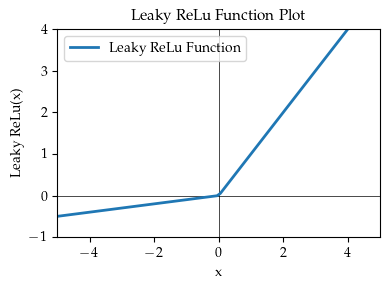

In [981]:
plt.show()
import numpy as np
import matplotlib.pyplot as plt

# Create an array of x values from -5 to 5
x = np.linspace(-5, 5, 100)
# Calculate the corresponding y values using the sigmoid function
y = leaky_relu(x)
# Create the plot
plt.figure(figsize=(4, 3))  # Set the figure size
plt.axhline(0, color='black', linewidth=0.5)  # Add a horizontal axis line
plt.axvline(0, color='black', linewidth=0.5)  # Add a vertical axis line
plt.plot(x, y, label='Leaky ReLu Function', linewidth=2)
plt.xlabel('x')
plt.ylabel('Leaky ReLu(x)')
plt.title('Leaky ReLu Function Plot')
plt.legend(loc='upper left')
plt.xlim(-5, 5)
plt.ylim(-1, 4)
# plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter2/Figs/Raster/leaky_relu.png', dpi=500)


# Interpretable Graph Net

In [1]:
import os
import pickle
from abc import ABC

import flax.linen as nn
import jax
import jax.numpy as np
import jax.tree_util as tree
import numpy as onp
import optax
from flax.training.train_state import TrainState
from jraph._src import utils
from optax import GradientTransformation

from swarmrl.exploration_policies.exploration_policy import ExplorationPolicy
from swarmrl.networks.network import Network
from swarmrl.observables.col_graph import GraphObservable
from swarmrl.sampling_strategies import GumbelDistribution
from swarmrl.models.interaction_model import Action, Colloid
from swarmrl.observables.col_graph import ColGraph

class EncodeNet(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.Dense(32)(x)
        x = nn.relu(x)
        return x


class EmbedNet(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.Dense(12)(x)
        return x


class ActNet(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.Dense(128)(x)
        x = nn.relu(x)
        x = nn.Dense(128)(x)
        x = nn.relu(x)
        y = nn.Dense(1)(x)
        x = nn.Dense(4)(x)

        return x, y


class InfluenceNet(nn.Module):
    """A simple dense model."""

    @nn.compact
    def __call__(self, x):
        x = nn.Dense(1)(x)
        return x


class GraphNet2(nn.Module):
    """
    Graph network class.
    Node features are encoded.
    Weighted messages are computed between nodes and aggregated.
    The network can learn to ignore messages from certain nodes.
    The aggregated messages are added to the node features and then aggregated using
    a softmax over the influence of each node.
    The influence of each node is computed using a simple dense network and is
    a measure of the importance of each node in the graph.
    """

    node_encoder: EncodeNet
    node_embedder: EmbedNet
    node_influence: InfluenceNet
    actress: ActNet
    temperature: float = 10.0

    @nn.compact
    def __call__(self, graph: GraphObservable):
        nodes, _, destinations, receivers, senders, _, n_node, n_edge = graph

        n_nodes = n_node[0]
        vodes = self.node_encoder(nodes)
        vodes = compute_pure_message(vodes, senders, receivers, n_nodes)
        vodes = np.concatenate([vodes, nodes[:, -1:]], axis=1)
        influence = self.node_influence(vodes)
        attention = nn.softmax(influence, axis=0)
        # stack the last entry of the node features to the vodes.
        graph_representation = np.sum(self.node_embedder(nodes) * attention, axis=0)
        logits, value = self.actress(graph_representation)

        return logits / self.temperature, value


class GraphNet(nn.Module):
    """
    Graph network class.
    Node features are encoded.
    Weighted messages are computed between nodes and aggregated.
    The network can learn to ignore messages from certain nodes.
    The aggregated messages are added to the node features and then aggregated using
    a softmax over the influence of each node.
    The influence of each node is computed using a simple dense network and is
    a measure of the importance of each node in the graph.
    """

    node_encoder: EncodeNet
    node_embedder: EmbedNet
    node_influence: InfluenceNet
    actress: ActNet
    temperature: float = 10.0

    @nn.compact
    def __call__(self, graph: GraphObservable):
        nodes, _, destinations, receivers, senders, _, n_node, n_edge = graph
        n_nodes = n_node[0]

        vodes = self.node_encoder(nodes)
        vodes = compute_pure_message(vodes, senders, receivers, n_nodes)
        vodes = np.concatenate([vodes, nodes[:, -1:]], axis=1)
        influence = self.node_influence(vodes)
        attention = nn.softmax(influence, axis=0)
        # stack the last entry of the node features to the vodes.
        graph_representation = np.sum(vodes * attention, axis=0)
        graph_representation = self.node_embedder(graph_representation)
        logits, value = self.actress(graph_representation)

        return logits / self.temperature, value,  influence, attention


def compute_pure_message(nodes, senders, receivers, n_nodes, message_passing_steps=1):
    """Compute the message for each node based on the influence between
    sender and receiver.
    """
    # for _ in range(message_passing_steps):
    send_messages = tree.tree_map(lambda n: n[senders], nodes)
    message = utils.segment_sum(send_messages, receivers, n_nodes)
    nodes = tree.tree_map(lambda n: n + message, nodes)

    return nodes


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
Could not find espressomd. Features will not be available


In [2]:
node_encoder = EncodeNet()
node_embedding= EmbedNet()
node_influence= InfluenceNet()
actress = ActNet()

PretGraphMod = GraphNet(
            node_encoder=node_encoder,
            node_embedder=node_embedding,
            node_influence=node_influence,
            actress=actress,
        )

In [3]:
def get_params(epoch):
    params = []
    for i in range(5):
        pather = f"/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/drug_delivery/graph{i}/Models_{epoch}/Model0.pkl"
        with open(pather, "rb") as f:
            model_params, _, _, _ = pickle.load(f)
        params.append({"params": model_params})
    return params
params = get_params(7300)

## Build Colloids

In [54]:
def get_paths(epoch):
    paths = []
    for i in range(5):
        path = f"/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/drug_delivery/graph{i}/Models_{epoch}/Model0.pkl"
        paths.append(path)
    return paths

In [55]:
def get_network_params(path):
    with open(path, "rb") as f:
        model_params, _, _, _ = pickle.load(f)
    return model_params

In [531]:
def create_colloids():
    central_colloid = [Colloid(pos=np.array([500, 500, 0]), director=np.array([1, 0, 0]), type=0, id=0)]

    other_colloids = []
    for i in range(2):
        theta = 2 * np.pi * i / 2 + np.pi / 2
        position = central_colloid[0].pos + 210 * np.array([np.cos(theta), np.sin(theta), 0])
        direction = np.array([np.cos(theta), np.sin(theta), 0])
        type = 0
        id = i + 1
        other_colloids.append(Colloid(pos=position, director=direction, type=type, id=id))

    drug = [Colloid(pos= central_colloid[0].pos + np.array([0, 200, 0]), director=np.array([0, 1, 0]), type=1, id=6)]

    colloids = central_colloid + other_colloids + drug
    return colloids

In [532]:
def rotate_drug_around_center(cols, n=360):
    configurations = []
    center = cols[0].pos
    angles = np.array([2 * np.pi * m / n for m in range(n)])
    for k in range(n):
        theta = 2 * np.pi * k / n
        position = center + 200 * np.array([np.cos(theta), np.sin(theta), 0])
        direction = np.array([np.cos(theta), np.sin(theta), 0])
        new_cols = cols[:-1] + [Colloid(pos=position, director=direction, type=1, id=6)]
        configurations.append(new_cols)
    return configurations, angles

In [533]:
def move_drug(cols, n=250):
    configurations = []
    center = cols[0].pos
    dists = [1 + 500 * m / n for m in range(n)]
    for k in range(n):
        dist = 1 + 500 * k / n
        position = center + dist * np.array([0, 1, 0])
        direction = np.array([0, 1, 0])
        new_cols = cols[:-1] + [Colloid(pos=position, director=direction, type=1, id=6)]
        configurations.append(new_cols)
    return configurations, dists

In [534]:
def get_graphs(configs):
    graph_observable = ColGraph(
        colloids=configs[0],
        cutoff=2.0,
        box_size=np.array([1000, 1000, 1000])
    )
    graphs = []
    for config in configs:
        graph = graph_observable.compute_initialization_input(config)
        graphs.append(graph)
    return graphs

In [535]:
def compute_attentions_and_influences(graphs, network_params):
    attentions = []
    influences = []
    for graph in graphs:
        _, _, influence, attention_scores = PretGraphMod.apply({"params": network_params}, graph)
        attentions.append(attention_scores)
        influences.append(influence)
    attentions = np.array(attentions)
    influences = np.array(influences)
    return attentions, influences

In [536]:
def compute_ensemble_attentions_and_influences(graphs, graph_model_params):
    ensemble_attentions = []
    ensemble_influences = []
    for network_params in graph_model_params:
        attentions, influences = compute_attentions_and_influences(graphs, network_params)
        ensemble_attentions.append(attentions)
        ensemble_influences.append(influences)
    ensemble_attentions = np.array(ensemble_attentions)
    ensemble_influences = np.array(ensemble_influences)
    return ensemble_attentions, ensemble_influences

In [537]:
epoch = 9900
paths = get_paths(epoch)
model_params = []
for path in paths:
    params = get_network_params(path)
    model_params.append(params)

In [538]:
colloids = create_colloids()
moved_configs, dists = move_drug(colloids, n=500)
rotated_configs, angles = rotate_drug_around_center(colloids)

In [539]:
rotated_graphs = get_graphs(rotated_configs)
moved_graphs = get_graphs(moved_configs)

In [540]:
move_attention, move_influence = compute_ensemble_attentions_and_influences(moved_graphs, model_params)

In [541]:
rotate_attention, rotate_influence = compute_ensemble_attentions_and_influences(rotated_graphs, model_params)

In [542]:
print(np.shape(move_attention))
print(np.shape(rotate_attention))

(5, 500, 3, 1)
(5, 360, 3, 1)


Text(0.5, 1.0, 'Attention of the drug over distance')

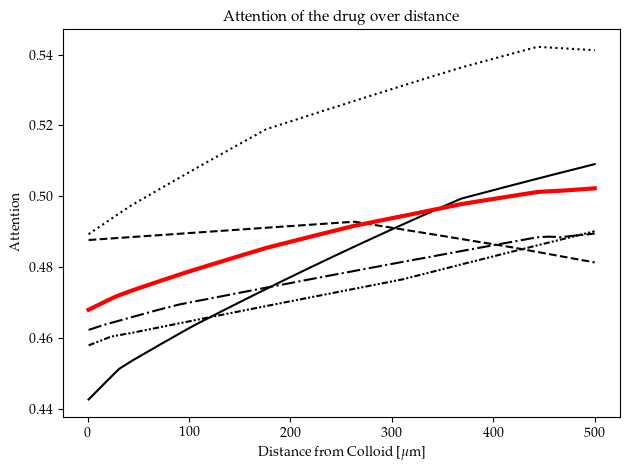

In [543]:
mean_dist_att = np.zeros_like(move_attention[0, :, -1])
line_styles = [(0, (3, 1, 1, 1, 1, 1)), "--", "-.", ":", "-", "."]
for i in range(5):
    mean_dist_att += np.array(move_attention[i, :, -1])
    plt.plot(dists, move_attention[i, :, -1], label=f"Model {i+1}", linestyle=line_styles[i], color="black")
plt.plot(dists, mean_dist_att / 5, label="Mean", color="red",linewidth=3)
plt.xlabel("Distance from Colloid [$\mu$m]")
plt.ylabel("Attention")
plt.title("Attention of the drug over distance")

Text(0.5, 1.0, 'Attention of the drug over distance')

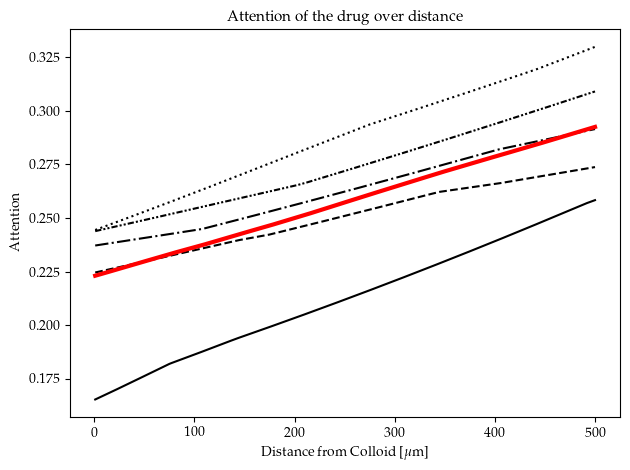

In [520]:
mean_dist_att = np.zeros_like(move_attention[0, :, -1])
line_styles = [(0, (3, 1, 1, 1, 1, 1)), "--", "-.", ":", "-", "."]
for i in range(5):
    mean_dist_att += np.array(move_attention[i, :, -1])
    plt.plot(dists, move_attention[i, :, -1], label=f"Model {i+1}", linestyle=line_styles[i], color="black")
plt.plot(dists, mean_dist_att / 5, label="Mean", color="red",linewidth=3)
plt.xlabel("Distance from Colloid [$\mu$m]")
plt.ylabel("Attention")
plt.title("Attention of the drug over distance")

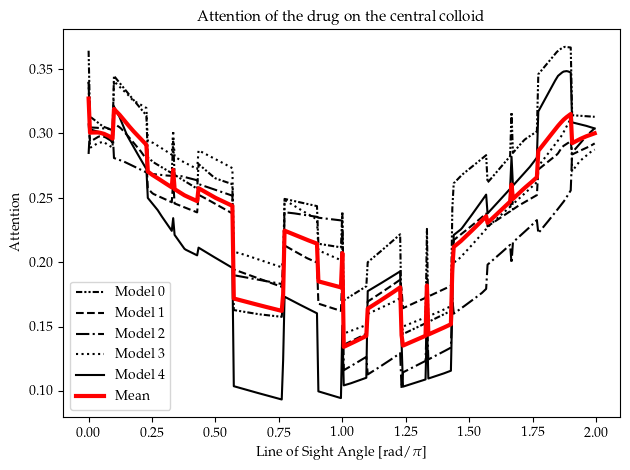

In [447]:

mean_rot_att = np.zeros_like(rotate_attention[0, :, -1])
line_styles = [(0, (3, 1, 1, 1, 1, 1)), "--", "-.", ":", "-", "."]
colormap = plt.cm.hsv
# shift angles by pi/2
for i in range(5):
    mean_rot_att += np.array(rotate_attention[i, :, -1])
    plt.plot(angles / np.pi, rotate_attention[i, :, -1], label=f"Model {i}", linestyle=line_styles[i], color="black")


plt.title("Attention of the drug on the central colloid")
plt.xlabel("Line of Sight Angle [rad/$\pi$]")
plt.ylabel("Attention")
plt.plot(angles / np.pi, mean_rot_att / 5, label="Mean", color="red",linewidth=3)
plt.legend()
# plt.savefig(f"/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/rot_attention_{epoch}.pdf")

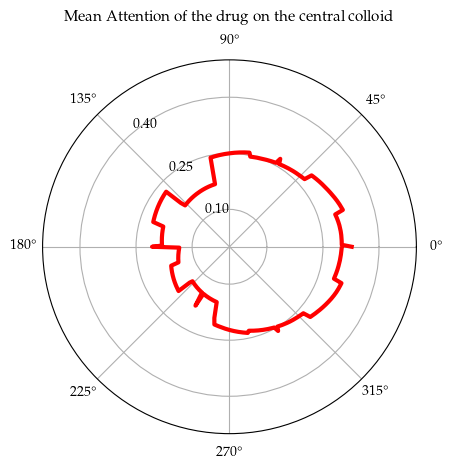

In [448]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, mean_rot_att / 5, color="red", linewidth=3)
ax.set_rmax(0.5)
ax.set_rticks([0.1, 0.25, 0.4])  # Less radial ticks
ax.set_rlabel_position(130)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Mean Attention of the drug on the central colloid", va='bottom')
# plt.savefig(f"/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/rot_attention_polar_{epoch}.pdf")

In [450]:
# create a plot of the two above plots

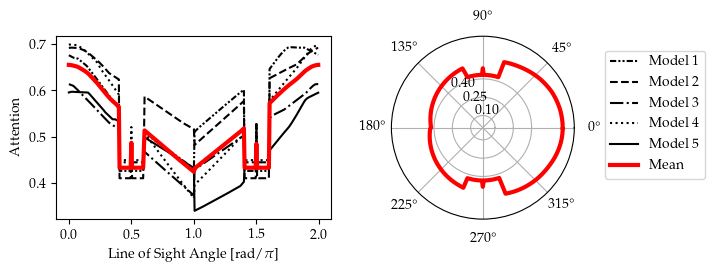

In [545]:
mean_rot_att = np.zeros_like(rotate_attention[0, :, -1])
line_styles = [(0, (3, 1, 1, 1, 1, 1)), "--", "-.", ":", "-", "."]

fig = plt.figure()
ax1 = plt.subplot(221)
ax2 = plt.subplot(222, projection='polar')

for i in range(5):
    mean_rot_att += np.array(rotate_attention[i, :, -1])
    ax1.plot(angles / np.pi, rotate_attention[i, :, -1], label=f"Model {i+1}", linestyle=line_styles[i], color="black")
ax1.plot(angles / np.pi, mean_rot_att / 5, label="Mean", color="red",linewidth=3)


ax1.set_xlabel("Line of Sight Angle [rad/$\pi$]")
ax1.set_ylabel("Attention")

fig.legend(loc='center right', bbox_to_anchor=(1.12, 0.75))


# ax2 = plt.subplots(subplot_kw={'projection': 'polar'})
ax2.plot(angles, mean_rot_att / 5, color="red", linewidth=3)
ax2.set_rmax(0.75)
ax2.set_rticks([0.1, 0.25, 0.4])  # Less radial ticks
ax2.set_rlabel_position(130)  # Move radial labels away from plotted line
ax2.grid(True)

# ax1.set_title("Attention of the drug on the central colloid")
# ax2.set_title("Mean Attention of the drug on the central colloid", va='bottom')
# fig.suptitle("Attention of the drug on the central colloid", fontsize=16, x=0.6)
plt.tight_layout()
# fig.savefig(f"/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/rot_attention_{epoch}.pdf", bbox_inches = "tight")



In [232]:
smell_0K_path ='/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/temperature_invest/smell/0/trajectory/trajectory.hdf5'
smell_300K_path = '/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/temperature_invest/smell/300/trajectory/trajectory.hdf5'
graph_0K_path = '/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/temperature_invest/graph/0/trajectory/trajectory.hdf5'
graph_300K_path = '/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/find_each_other/graph/trajectory_OG/trajectory.hdf5'
temp_paths = [smell_0K_path, smell_300K_path, graph_0K_path, graph_300K_path]

In [233]:
def download_trajectory(path):
    with hf.File(path, 'r') as db:
        position_data = np.array(db["colloids"]["Unwrapped_Positions"][::1])[:,0:20,0:2]
    return position_data

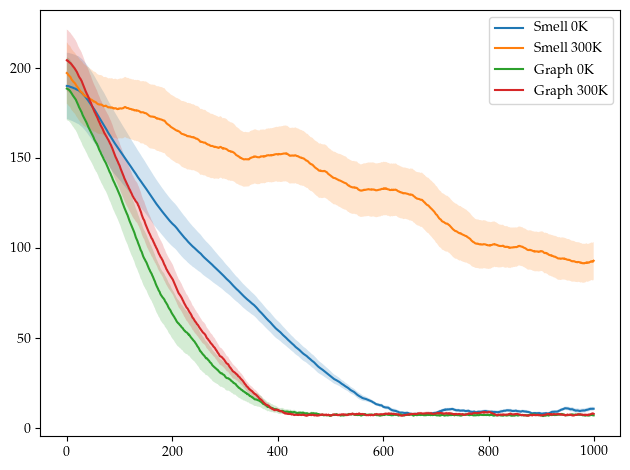

In [669]:
smell_0K = download_trajectory(smell_0K_path)
smell_300K = download_trajectory(smell_300K_path)
graph_0K = download_trajectory(graph_0K_path)
graph_300K = download_trajectory(graph_300K_path)
pos_group_data = [smell_0K, smell_300K, graph_0K, graph_300K]
colors = ["red", "blue", "green", "orange"]
label = ["Smell 0K", "Smell 300K", "Graph 0K", "Graph 300K"]
for i, data in enumerate(pos_group_data):
    # compute the distance to the center of mass of the data
    center_of_mass = np.mean(data, axis=1)[0:1000]
    dist = np.linalg.norm(data[0:1000] - center_of_mass[:, np.newaxis, :], axis=2)
    mean = np.mean(dist, axis=1)
    plt.plot(mean, label=f" {label[i]}")
    std_value = np.std(dist, axis=1) / np.sqrt(20)
    plt.fill_between(np.arange(1000), mean-std_value, mean+std_value, alpha=0.2)

# plt.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1)
# plt.ylim(0, 13)
# plt.set_xlabel("Time in [s]")
# plt.set_ylabel("Mean distance in [$\mu$m]")
# plt.set_title("Mean final distance to Center of Mass")
# dist_ax.text(0.2, 0.95, 'c)', transform=dist_ax.transAxes, fontsize=16, fontweight='bold', va='top')
plt.legend()
plt.show()
#
# dist_zoom_ax = fig.add_subplot(gs[3:5, 1])
# label = ["Smell", "Cone", "Graph"]
# center = 500 * np.ones((np.shape(pos_group_data[0])[0], 1, 2))
# for i, data in enumerate(pos_group_data):
#     center_of_mass = np.mean(data, axis=1)[1000:]
#     dist = np.linalg.norm(data[1000:] - center_of_mass[:, np.newaxis, :], axis=2)
#     mean = np.mean(dist, axis=1)
#     dist_zoom_ax.plot(np.arange(np.shape(dist)[0])+1000, mean, label=label[i])
#     std_value = np.std(dist, axis=1) / np.sqrt(20)
#     dist_zoom_ax.fill_between(np.arange(np.shape(dist)[0])+1000, mean-std_value, mean+std_value, alpha=0.2)
#
# dist_zoom_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1)
# dist_zoom_ax.set_xlabel("Time in [s]")
# dist_zoom_ax.set_ylabel("Mean distance in [$\mu$m]")
# dist_zoom_ax.set_ylim([5, 30])
# dist_zoom_ax.set_title("Mean final distance to Center of Mass")
# # dist_zoom_ax.text(0.05, 0.95, 'd)', transform=dist_zoom_ax.transAxes, fontsize=16, fontweight='bold', va='top')
#
#
# traj_group_ax = fig.add_subplot(gs[0:3, 1])
# # list from 0 to 19
# n_smell = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# n_cone = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
# n_graph = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#
#
# traj_group_ax.plot(smell_group_pos[:,n_smell,0][0:1000]+200, smell_group_pos[:,n_smell,1][0:1000], label="Smell", color=colors[0])
# traj_group_ax.plot(cone_group_pos[:,n_cone,0][0:1000], cone_group_pos[:,n_cone,1][0:1000], label="Cone",  color=colors[1])
# traj_group_ax.plot(graph_group_pos[:,n_graph,0][0:1000], graph_group_pos[:,n_graph,1][0:1000], label="Graph", color=colors[2])
# # traj_group_ax.plot(500, 500, 'x', color='black', markersize=10, label="Center")
#
#
# traj_group_ax.legend(custom_lines, ['Smell', 'Cone', 'Graph'], labelspacing=0.1, loc="upper left")
# traj_group_ax.set_xlabel(r"x position in [$\mu$m]")
# traj_group_ax.set_ylabel(r"y position in [$\mu$m]")
# traj_group_ax.set_title("Trajectories of different methods")
# # traj_group_ax.set_xlim(100, 900)
# # traj_group_ax.set_ylim(100, 900)
# # traj_ax.text(0.05, 0.95, 'b)', transform=traj_ax.transAxes, fontsize=16, fontweight='bold', va='top')
#
# # plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/find_each_other.pdf')


In [589]:
path0 = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/drug_delivery/graph0/trajectory/trajectory.hdf5"
path1 = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/drug_delivery/graph1/trajectory/trajectory.hdf5"
path2 = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/drug_delivery/graph2/trajectory/trajectory.hdf5"
path3 = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/drug_delivery/graph3/trajectory/trajectory.hdf5"
path4 = "/tikhome/dzimmer/work/repositories/SwarmRL/swarmrl/zum_deploy/deployment/drug_delivery/graph4/trajectory/trajectory.hdf5"
paths = [path0, path1, path2, path3, path4]

In [662]:
def download_trajectory_time(path):
    with hf.File(path, 'r') as db:
        position_data = np.array(db["colloids"]["Unwrapped_Positions"][::1])[:,0:20,0:2]
        time = np.array(db["colloids"]["Times"][::1])
    return position_data, time

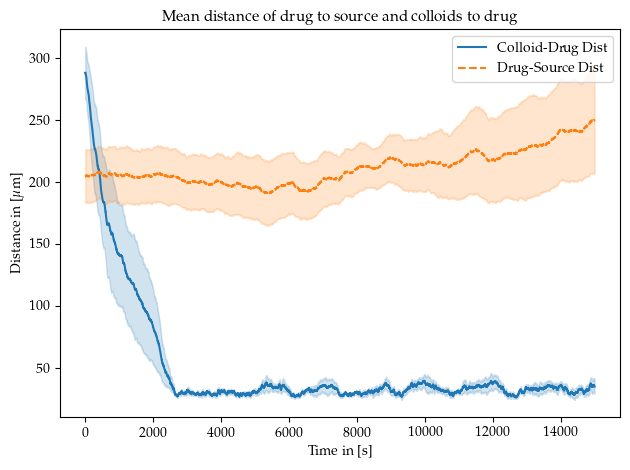

In [667]:
linestyles = ['-', (0, (1, 10)), '--', (5, (10, 3)), (0, (1, 10))]
col_drug_dist_mean = []
drug_source_dist_mean = []
for i, path in enumerate(paths):
    traj0, time = download_trajectory_time(path)
    source = traj0[:, -1, :]
    drug = traj0[:, -2, :]
    cols = traj0[:, 0:-2, :]

    col_drug_dist = np.linalg.norm(cols - drug[:, np.newaxis, :], axis=2)
    mean_col_drug_dist = np.mean(col_drug_dist, axis=1)


    drug_source_dist = np.linalg.norm(drug - source, axis=1)
    col_drug_dist_mean.append(mean_col_drug_dist)
    drug_source_dist_mean.append(drug_source_dist)

time = np.squeeze(time)

col_drug_dist_mean = np.array(col_drug_dist_mean)
drug_source_dist_mean = np.array(drug_source_dist_mean)

c_d_d = np.mean(col_drug_dist_mean, axis=0)
c_d_d_var = np.std(col_drug_dist_mean, axis=0) / np.sqrt(5)
d_s_d = np.mean(drug_source_dist_mean, axis=0)
d_s_d_var = np.std(drug_source_dist_mean, axis=0) / np.sqrt(5)

plt.plot(time, c_d_d, color='#1f77b4', linestyle='-', label=f"Colloid-Drug Dist")
plt.fill_between(np.arange(np.shape(col_drug_dist_mean)[1]), c_d_d-c_d_d_var, c_d_d+c_d_d_var, alpha=0.2, color='#1f77b4')
plt.plot(time, d_s_d, color='#ff7f0e', linestyle='--' , label=f"Drug-Source Dist")
plt.fill_between(np.arange(np.shape(drug_source_dist_mean)[1]), d_s_d-d_s_d_var, d_s_d+d_s_d_var, alpha=0.2, color='#ff7f0e')


plt.xlabel("Time in [s]")
plt.ylabel("Distance in [$\mu$m]")
plt.title("Mean distance of drug to source and colloids to drug")
plt.legend()
plt.savefig(f'/tikhome/dzimmer/work/Thesis/thesis/Chapter4/Figs/Raster/drug_delivery_dists.pdf', bbox_inches='tight')